In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

C:\Users\Lenovo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
def DataCleaner() -> (pd.DataFrame, pd.Series, pd.Series):
    # 讀資料
    df = pd.read_csv("../data/train.csv")
    
    # 把adr的極端值去除
    df = df[df["adr"] < 3000]
    
    # 把類別特徵轉換成類別結構，有日期、哪一家飯店、餐點、市佔率、販售渠道、預約房型、指派的房型、有無押金、顧客類型、最後預約狀況
    for col in ["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "hotel", "meal", "market_segment",
                "distribution_channel", "reserved_room_type",
            "assigned_room_type", "deposit_type", "customer_type", "reservation_status"]:
        df[col] = df[col].astype("category")
    
    # 把測試資料中沒有的欄位: adr ,is_canceled, reservation_status, reservation_status_date 以及無用的: ID, 入住星期 拔除
    # 還有NA過多的company和agent
    df = df.drop(["ID", "reservation_status", "reservation_status_date",
              "arrival_date_week_number", "company", "agent"], axis = 1)
    
    # NA drop
    df = df.dropna(0)
    dfAdr, dfIsCancel = df["adr"], df["is_canceled"]
    #df = df.drop(["adr", "is_canceled"])
    
    # 把國家這個欄位轉成「葡萄牙」和「非葡萄牙」的類別變數 (葡萄牙佔50%)
    df["PRT"], df["NPRT"] = df["country"] == "PRT", ~(df["country"] == "PRT")
    df["PRT"], df["NPRT"] = df["PRT"].astype("int"), df["NPRT"].astype("int")
    df = df.drop(["country"], axis=1)
    
    # 把Children 轉成int 結構
    df["children"] = df["children"].astype("int")
    
    # 把類別變數展開
    df = pd.get_dummies(df)
    
    return df, dfAdr, dfIsCancel

In [3]:
df = pd.read_csv("../data/train.csv")
testDf = pd.read_csv("../data/test.csv")

Company Columns:  

NA值很多，大概有94%，有幾家固定的公司一年會有很多訂單，最後要改進的時候再把它放進來

Agent Columns:
Categorical data, 很多樣而且很雜, 最後要改的時候再把它放進來

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029177045C88>]],
      dtype=object)

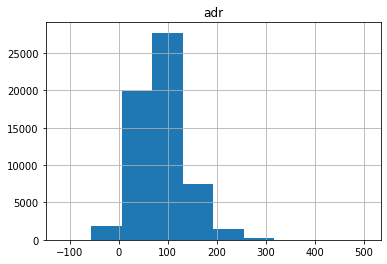

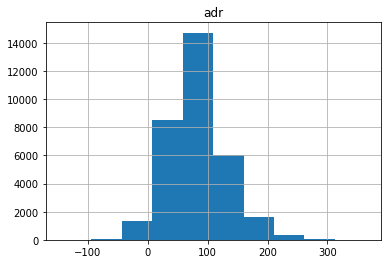

In [4]:
#indexes =  df[~df["company"].isna()].index
#dfCompany = df.loc[indexes]

#indexes =  df[~df["agent"].isna()].index
#dfAgent = df.loc[indexes]
#dfAgent["agent"].value_counts()

df = df[df["adr"] < 3000]
df[df["is_canceled"] == 0].hist(column = ["adr"])
df[df["is_canceled"] == 1].hist(column = ["adr"])

## SVM conduct

In [5]:
df, dfAdr, dfIsCancel = DataCleaner()

In [6]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR

indexes = np.random.choice(df.index, size = 17999)
trainX, ValX = df.drop(indexes).to_numpy(), df.loc[indexes].to_numpy()
train_Cancel, Val_Cancel = dfIsCancel.drop(indexes).to_numpy(), dfIsCancel.loc[indexes].to_numpy()
train_Adr, Val_Adr = dfAdr.drop(indexes).to_numpy(), dfAdr.loc[indexes].to_numpy()

In [7]:
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(trainX, train_Cancel)
Cancel_predict = model.predict(trainX)

In [ ]:
from sklearn.metrics import mean_squared_error

In [209]:
indexes = np.random.choice(df.index)
trainX = df.to_numpy()
trainY = dfIsCancel

# model = svm(trainY, trainX, "-s 0 -t 2 -c 0.1")

In [212]:
scores = cross_val_score(model, trainX, trainY, cv=5)

In [214]:
scores

array([-0.19413339, -0.18076041, -0.18048727, -0.22326013, -0.22900847])

In [164]:
from svmutil import *

In [208]:
indexes = np.random.choice(df.index)
trainX = df.to_numpy()
trainY = dfIsCancel

# model = svm(trainY, trainX, "-s 0 -t 2 -c 0.1")